In [1]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import yaml
from collections import deque
from time import sleep, perf_counter
import yaml

from Arduino import Arduino

In [2]:
with open("config.yaml", "r") as file:
    config = yaml.safe_load(file)

port = config["port"]
max_slider_value = config["max_slider_value"]
baud_rate = config["baud_rate"]

data = deque()

arduino = Arduino(port, baud_rate)

In [4]:
def collect_data(collection_time=5):
    data = deque()
    start_time = perf_counter()
    end_time = start_time + collection_time
    
    while(perf_counter() < end_time):
        data.append(arduino.get_values()[0])
    data = np.array(list(data))
    x = np.linspace(start=0, stop=collection_time, num=len(data))
    return data

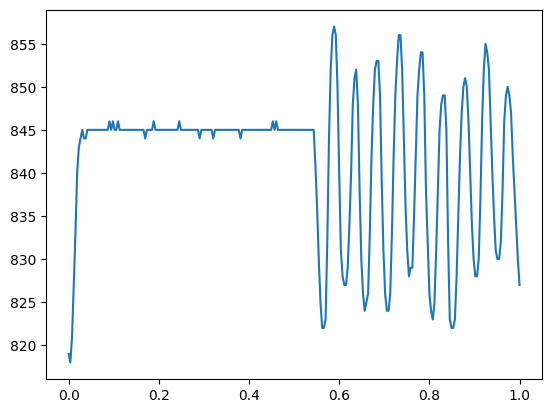

In [12]:
data = collect_data()
x = np.linspace(0, 1, len(data))
plt.plot(x, data, "-")
plt.show()

c:\Users\Parker\source\Deaj\.venv\Lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Parker\source\Deaj\.venv\Lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


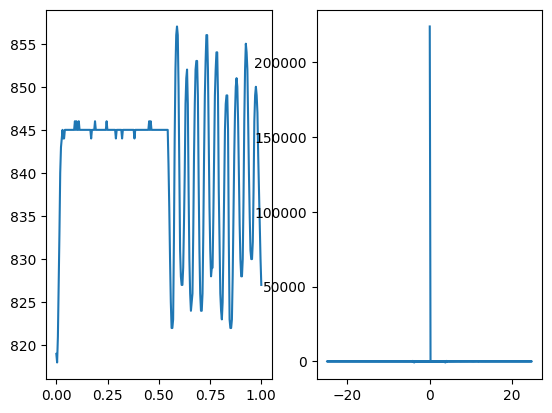

In [13]:
fft_y = scp.fft.fft(data)
fft_x = scp.fft.fftfreq(len(data), 1/50)
fig, (data_ax, fft_ax) = plt.subplots(1, 2)
data_ax.plot(x, data)
fft_ax.plot(fft_x, fft_y)

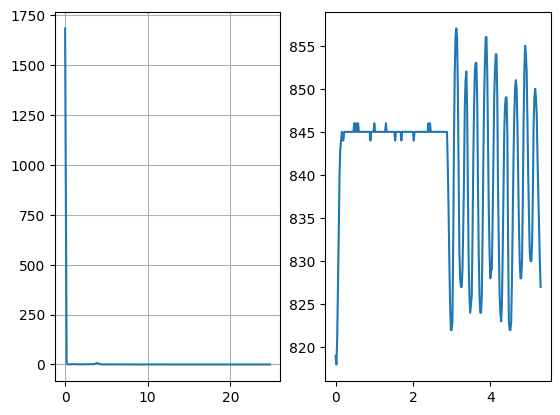

In [14]:
from scipy.fft import fft, fftfreq
import numpy as np
# Number of sample points
N = len(data)
# sample spacing
T = 1.0 / 50.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = data
yf = fft(y)
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
ax1.grid()
ax2.plot(x, y)

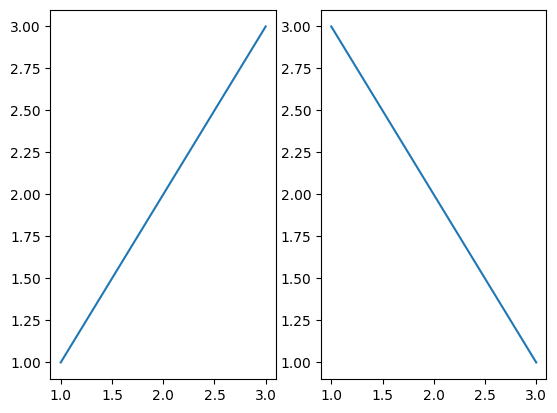

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot([1, 2, 3], [1, 2, 3])
ax2.plot([3, 2, 1], [1, 2, 3])